# 🔬 Two-Photon Microscope Beam Propagation & Ray Diagram
This notebook simulates and visualizes the optical path of a two-photon microscope system including:
- Beam expansion and pre-chirping (FemtoControl)
- A z-arm with a remote focusing unit
- Scan optics (galvo mirrors, scan and tube lenses)

We will:
1. Create a schematic ray diagram of the system
2. Simulate Gaussian beam propagation using LightPipes
3. Visualize wavefront curvature and beam waist evolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LightPipes import *

# Constants
wavelength = 920e-9  # Ti:Sapphire output
size = 5e-3
N = 500
mm = 1e-3

## 🧭 Step 1: Draw Ray Diagram (Schematic)

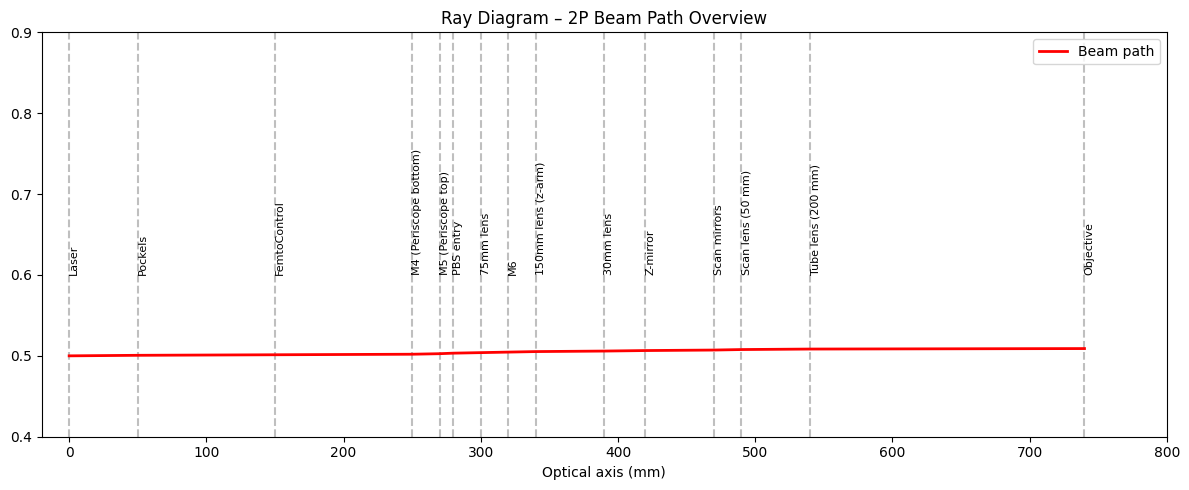

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
positions = {
    'Laser': 0,
    'Pockels': 50,
    'FemtoControl': 150,
    'M4 (Periscope bottom)': 250,
    'M5 (Periscope top)': 270,
    'PBS entry': 280,
    '75mm lens': 300,
    'M6': 320,
    '150mm lens (z-arm)': 340,
    '30mm lens': 390,
    'Z-mirror': 420,
    'Scan mirrors': 470,
    'Scan lens (50 mm)': 490,
    'Tube lens (200 mm)': 540,
    'Objective': 740
}
for name, x in positions.items():
    ax.axvline(x, color='gray', linestyle='--', alpha=0.5)
    ax.text(x, 0.6, name, rotation=90, verticalalignment='bottom', fontsize=8)
x_vals = list(positions.values())
y_vals = [0.5 + 0.02*np.sin(i/30) for i in range(len(x_vals))]
ax.plot(x_vals, y_vals, color='red', linewidth=2, label='Beam path')
ax.set_ylim(0.4, 0.9)
ax.set_xlim(-20, 800)
ax.set_xlabel('Optical axis (mm)')
ax.set_title('Ray Diagram – 2P Beam Path Overview')
ax.legend()
plt.tight_layout()
plt.show()

## 🔬 Step 2: Simulate Beam Propagation Through Remote Focusing Section

using GaussLens
1.55461295626477
using GForvard, pure Gauss field
using GaussLens
14.858963941003786
using GForvard, pure Gauss field
using GaussLens
24.72292265221293
using GForvard, pure Gauss field
0.0009228806607148404
using GForvard, pure Gauss field
using GaussLens
14.89379036135587
using GForvard, pure Gauss field
using GaussLens
3.2967310378985863
using GForvard, pure Gauss field
using GaussLens


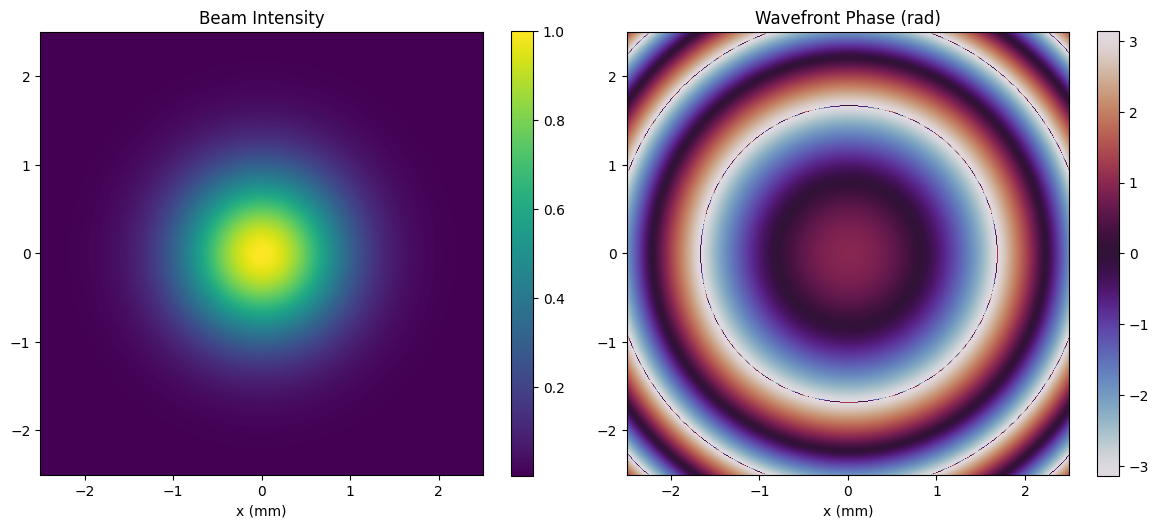

In [4]:
f1 = 75 * mm
f2 = 150 * mm
f_focus = 30 * mm
z_mirror = 50e-6

F = Begin(size, wavelength, N)
F = GaussBeam(F, size / 4)
F = Lens(F, f1)
F = Propagate(F, f1 + f2)
F = Lens(F, f2)
F = Propagate(F, 50e-3)
F = Lens(F, f_focus)
F = Propagate(F, f_focus + z_mirror)
F = Propagate(F, f_focus + z_mirror)
F = Lens(F, f_focus)
F = Propagate(F, 50e-3)
F = Lens(F, f2)
F = Propagate(F, f1 + f2)
F = Lens(F, f1)
I = Intensity(1, F)
phase = Phase(F)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(I, extent=[-size/2*1e3, size/2*1e3, -size/2*1e3, size/2*1e3])
plt.title("Beam Intensity")
plt.xlabel("x (mm)")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(phase, extent=[-size/2*1e3, size/2*1e3, -size/2*1e3, size/2*1e3], cmap='twilight')
plt.title("Wavefront Phase (rad)")
plt.xlabel("x (mm)")
plt.colorbar()
plt.tight_layout()
plt.show()